In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's create a regression dataset for our problem
X_reg = tf.range(0, 1000, 5)
X_reg

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
       390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
       455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
       520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
       585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
       650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
       715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
       780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
       845, 850, 8

In [3]:
y_reg = X_reg + 100
y_reg

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([ 100,  105,  110,  115,  120,  125,  130,  135,  140,  145,  150,
        155,  160,  165,  170,  175,  180,  185,  190,  195,  200,  205,
        210,  215,  220,  225,  230,  235,  240,  245,  250,  255,  260,
        265,  270,  275,  280,  285,  290,  295,  300,  305,  310,  315,
        320,  325,  330,  335,  340,  345,  350,  355,  360,  365,  370,
        375,  380,  385,  390,  395,  400,  405,  410,  415,  420,  425,
        430,  435,  440,  445,  450,  455,  460,  465,  470,  475,  480,
        485,  490,  495,  500,  505,  510,  515,  520,  525,  530,  535,
        540,  545,  550,  555,  560,  565,  570,  575,  580,  585,  590,
        595,  600,  605,  610,  615,  620,  625,  630,  635,  640,  645,
        650,  655,  660,  665,  670,  675,  680,  685,  690,  695,  700,
        705,  710,  715,  720,  725,  730,  735,  740,  745,  750,  755,
        760,  765,  770,  775,  780,  785,  790,  795,  800,  805,  810,
     

In [ ]:
len(X_reg), len(y_reg)

In [4]:
# Split the data iinto training and testing data
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

In [9]:
# Let's build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])  

# 2. Compile the model, this time with a regression specific loss function
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X_reg_train, axis= -1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 453.4446 - mae: 453.4446
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 320.2205 - mae: 320.2205
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 191.2386 - mae: 191.2386
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 64.0293 - mae: 64.0293
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 81.4613 - mae: 81.4613
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 93.3830 - mae: 93.3830
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 57.4754 - mae: 57.4754
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 50.6911 - mae: 50.6911
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 48.2152 - mae: 48.2152
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 45.3039 - mae: 45.3039
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 1ms/step


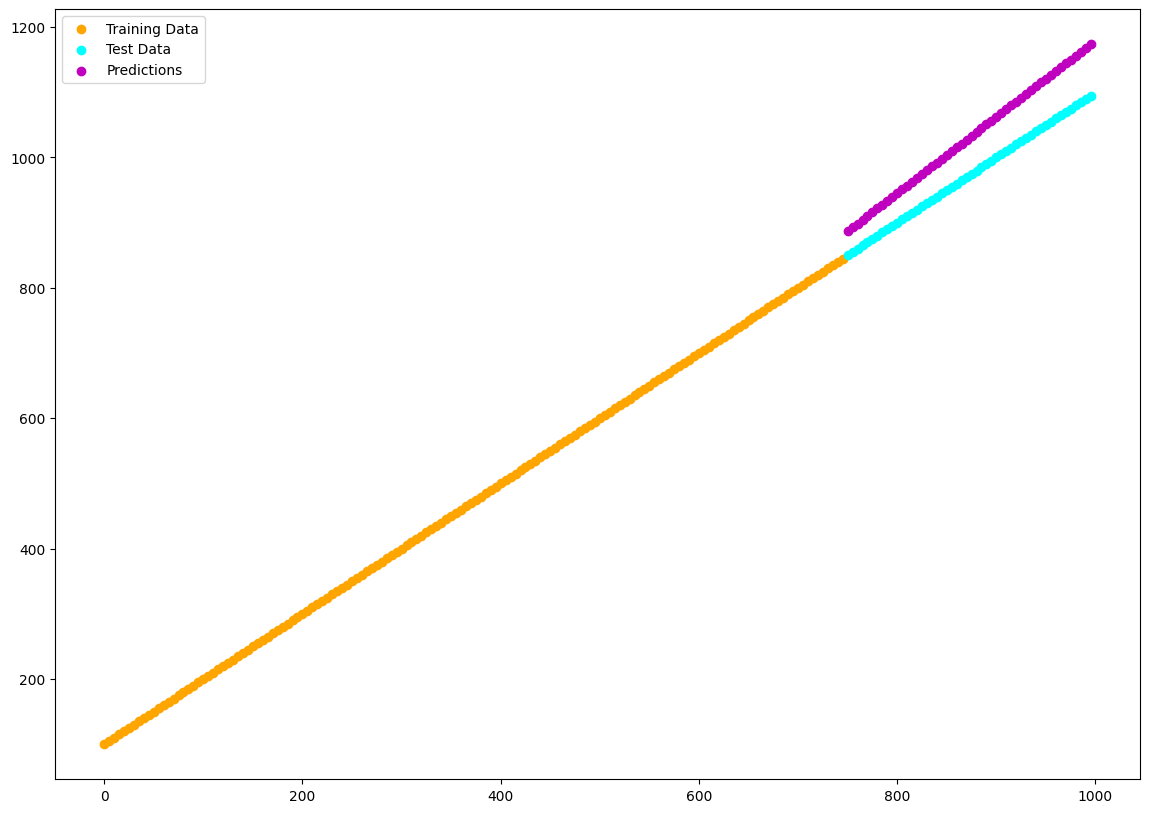

In [11]:
# Make predictions with our trained model
y_reg_preds = model.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(14,10))
plt.scatter(X_reg_train, y_reg_train, c="orange", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="cyan", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="m", label="Predictions")
plt.legend()